In [1]:
import sklearn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import requests
from pathlib import Path
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

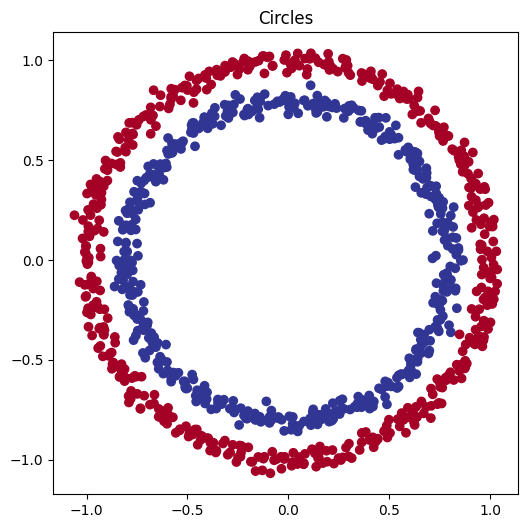

In [3]:
X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)

plt.figure(figsize=(6, 6))
plt.title("Circles")
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
class CircleModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=128),
        nn.GELU(),
        nn.Linear(in_features=128, out_features=256),
        nn.GELU(),
        nn.Linear(in_features=256, out_features=128),
        nn.GELU(),
        nn.Linear(in_features=128, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_0 = CircleModelV1(2, 1).to(device)
model_0

CircleModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1) # set learning rate from 0.01 to 0.1
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [8]:
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


epochs = 1000

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()

    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")





Epoch: 0 | Loss: 0.69294 | Acc: 49.38 | Test Loss: 0.69308 | Test Acc: 52.00
Epoch: 50 | Loss: 0.69203 | Acc: 51.88 | Test Loss: 0.69241 | Test Acc: 51.50
Epoch: 100 | Loss: 0.69105 | Acc: 55.38 | Test Loss: 0.69168 | Test Acc: 55.50
Epoch: 150 | Loss: 0.68989 | Acc: 56.88 | Test Loss: 0.69081 | Test Acc: 58.00
Epoch: 200 | Loss: 0.68846 | Acc: 57.88 | Test Loss: 0.68973 | Test Acc: 58.50
Epoch: 250 | Loss: 0.68661 | Acc: 59.75 | Test Loss: 0.68833 | Test Acc: 59.50
Epoch: 300 | Loss: 0.68409 | Acc: 61.25 | Test Loss: 0.68641 | Test Acc: 62.50
Epoch: 350 | Loss: 0.68052 | Acc: 63.38 | Test Loss: 0.68362 | Test Acc: 64.50
Epoch: 400 | Loss: 0.67519 | Acc: 66.25 | Test Loss: 0.67935 | Test Acc: 67.00
Epoch: 450 | Loss: 0.66680 | Acc: 70.50 | Test Loss: 0.67235 | Test Acc: 69.00
Epoch: 500 | Loss: 0.65261 | Acc: 80.00 | Test Loss: 0.66004 | Test Acc: 73.50
Epoch: 550 | Loss: 0.62647 | Acc: 85.00 | Test Loss: 0.63691 | Test Acc: 79.00
Epoch: 600 | Loss: 0.57222 | Acc: 94.00 | Test Loss: 0.

In [9]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py exists!")
else:
  print("Download helper_function.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py exists!


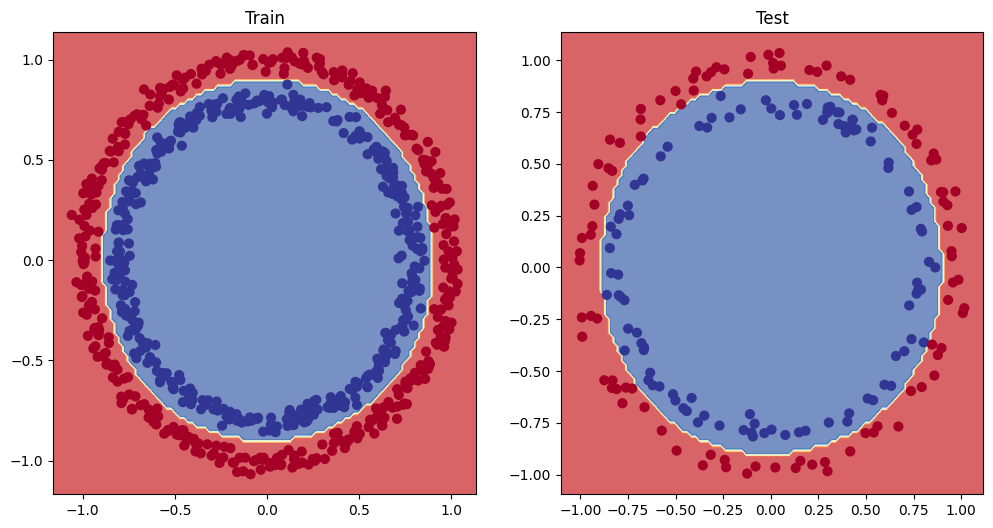

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

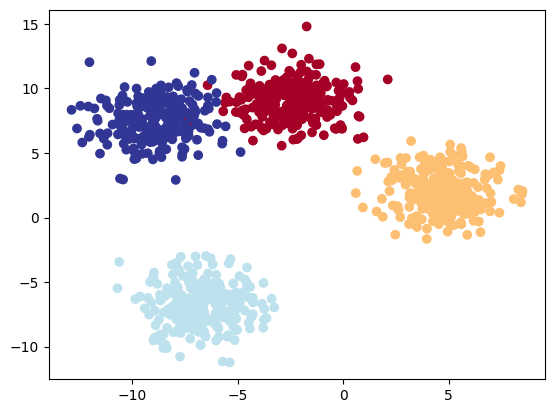

In [12]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

plt.scatter(X_blob[:, 0],
            X_blob[:, 1],
            c=y_blob,
            cmap=plt.cm.RdYlBu);



In [13]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


In [14]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

In [15]:
class BlobModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=64),
        nn.Linear(in_features=64, out_features=128),
        nn.Linear(in_features=128, out_features=64),
        nn.Linear(in_features=64, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_1 = BlobModelV1(2, 4).to(device)
model_1


BlobModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train, = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred, dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_blob_test)

    test_pred = torch.softmax(test_logits, dim=1)
    test_pred = torch.argmax(test_pred, dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_pred)

    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.63093 | Acc: 35.38 | Test Loss: 1.96199 | Test Acc: 74.00
Epoch: 50 | Loss: 0.03420 | Acc: 99.25 | Test Loss: 0.02530 | Test Acc: 99.50
Epoch: 100 | Loss: 0.02703 | Acc: 99.25 | Test Loss: 0.01720 | Test Acc: 99.50
Epoch: 150 | Loss: 0.02534 | Acc: 99.25 | Test Loss: 0.01499 | Test Acc: 99.50
Epoch: 200 | Loss: 0.02455 | Acc: 99.38 | Test Loss: 0.01392 | Test Acc: 99.50
Epoch: 250 | Loss: 0.02404 | Acc: 99.38 | Test Loss: 0.01325 | Test Acc: 99.50
Epoch: 300 | Loss: 0.02365 | Acc: 99.38 | Test Loss: 0.01276 | Test Acc: 99.50
Epoch: 350 | Loss: 0.02332 | Acc: 99.38 | Test Loss: 0.01237 | Test Acc: 99.50
Epoch: 400 | Loss: 0.02303 | Acc: 99.38 | Test Loss: 0.01204 | Test Acc: 99.50
Epoch: 450 | Loss: 0.02277 | Acc: 99.38 | Test Loss: 0.01174 | Test Acc: 99.50
Epoch: 500 | Loss: 0.02252 | Acc: 99.38 | Test Loss: 0.01147 | Test Acc: 99.50
Epoch: 550 | Loss: 0.02229 | Acc: 99.38 | Test Loss: 0.01121 | Test Acc: 99.50
Epoch: 600 | Loss: 0.02206 | Acc: 99.50 | Test Loss: 0.

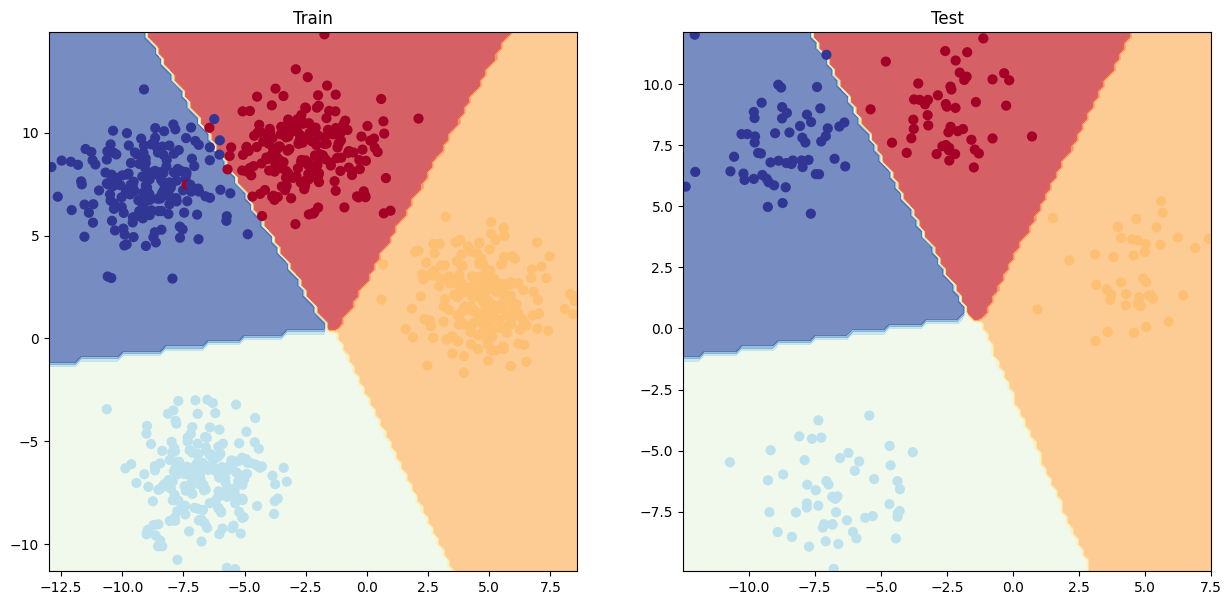

In [18]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

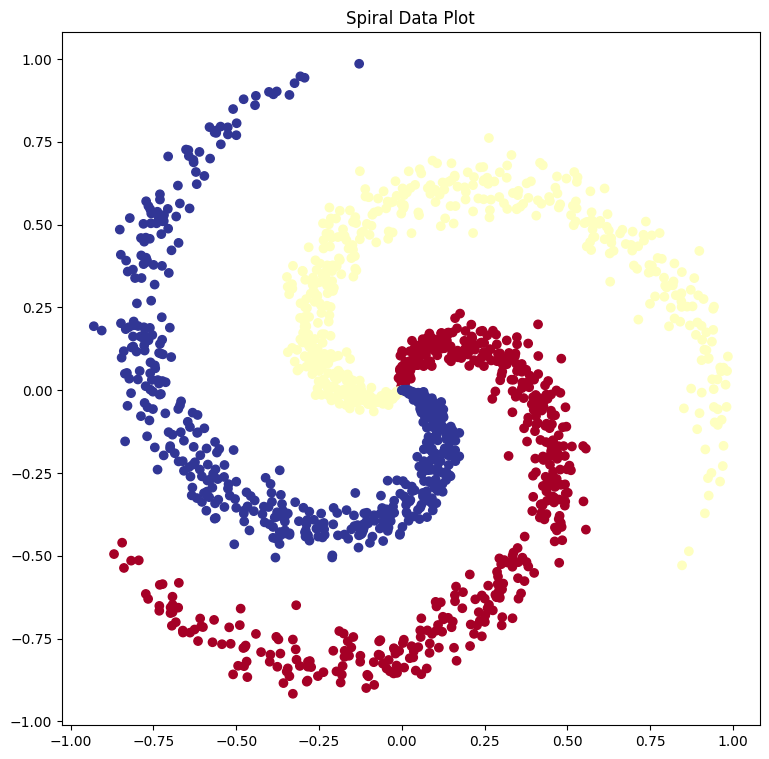

In [20]:
N = 500
D = 2
K = 3

X_spiral = np.zeros((N * K, D))
y_spiral = np.zeros(N * K, dtype="uint8")

for i in range(K):
  ix = range(N * i, N * (i + 1))
  r = np.linspace(0.0, 1, N)
  t = np.linspace(i * 4, (i + 1) * 4, N) + np.random.randn(N) * 0.2

  X_spiral[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y_spiral[ix] = i


plt.figure(figsize=(9, 9))
plt.title("Spiral Data Plot")
plt.scatter(X_spiral[:, 0],
            X_spiral[:, 1],
            c=y_spiral,
            cmap=plt.cm.RdYlBu);

In [21]:
X_spiral = torch.from_numpy(X_spiral).type(torch.float)
y_spiral = torch.from_numpy(y_spiral).type(torch.LongTensor)

In [22]:
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral, y_spiral,
                                                                                test_size=0.2,
                                                                                random_state=42)

In [23]:
X_spiral_train.shape, X_spiral_test.shape, y_spiral_train.shape, y_spiral_test.shape

(torch.Size([1200, 2]),
 torch.Size([300, 2]),
 torch.Size([1200]),
 torch.Size([300]))

In [24]:
class SpiralModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=64),
        nn.GELU(),
        nn.Linear(in_features=64, out_features=256),
        nn.GELU(),
        nn.Linear(in_features=256, out_features=64),
        nn.GELU(),
        nn.Linear(in_features=64, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_2 = SpiralModelV1(2, 3).to(device)
model_2

SpiralModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=256, out_features=64, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_spiral_test = X_spiral_test.to(device), y_spiral_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_spiral_train)

  y_pred = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred, dim=1)

  loss = loss_fn(y_logits, y_spiral_train)
  acc = accuracy_fn(y_spiral_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_spiral_test)

    test_pred = torch.softmax(test_logits, dim=1)
    test_pred = torch.argmax(test_pred, dim=1)

    test_loss = loss_fn(test_logits, y_spiral_test)
    test_acc = accuracy_fn(y_spiral_test, test_pred)

    if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.10022 | Acc: 32.50 | Test Loss: 1.09550 | Test acc: 36.67
Epoch: 50 | Loss: 1.06537 | Acc: 59.17 | Test Loss: 1.06653 | Test acc: 56.33
Epoch: 100 | Loss: 0.98997 | Acc: 59.67 | Test Loss: 0.98872 | Test acc: 55.33
Epoch: 150 | Loss: 0.83252 | Acc: 52.17 | Test Loss: 0.83073 | Test acc: 50.33
Epoch: 200 | Loss: 0.74332 | Acc: 54.67 | Test Loss: 0.75009 | Test acc: 57.67
Epoch: 250 | Loss: 0.71677 | Acc: 54.25 | Test Loss: 0.73040 | Test acc: 57.00
Epoch: 300 | Loss: 0.69689 | Acc: 54.33 | Test Loss: 0.71040 | Test acc: 58.00
Epoch: 350 | Loss: 0.67502 | Acc: 55.42 | Test Loss: 0.68631 | Test acc: 57.67
Epoch: 400 | Loss: 0.65121 | Acc: 57.83 | Test Loss: 0.65996 | Test acc: 58.67
Epoch: 450 | Loss: 0.62522 | Acc: 59.92 | Test Loss: 0.63246 | Test acc: 60.00
Epoch: 500 | Loss: 0.59494 | Acc: 63.33 | Test Loss: 0.60249 | Test acc: 63.00
Epoch: 550 | Loss: 0.55674 | Acc: 67.08 | Test Loss: 0.56629 | Test acc: 68.67
Epoch: 600 | Loss: 0.50682 | Acc: 71.33 | Test Loss: 0.

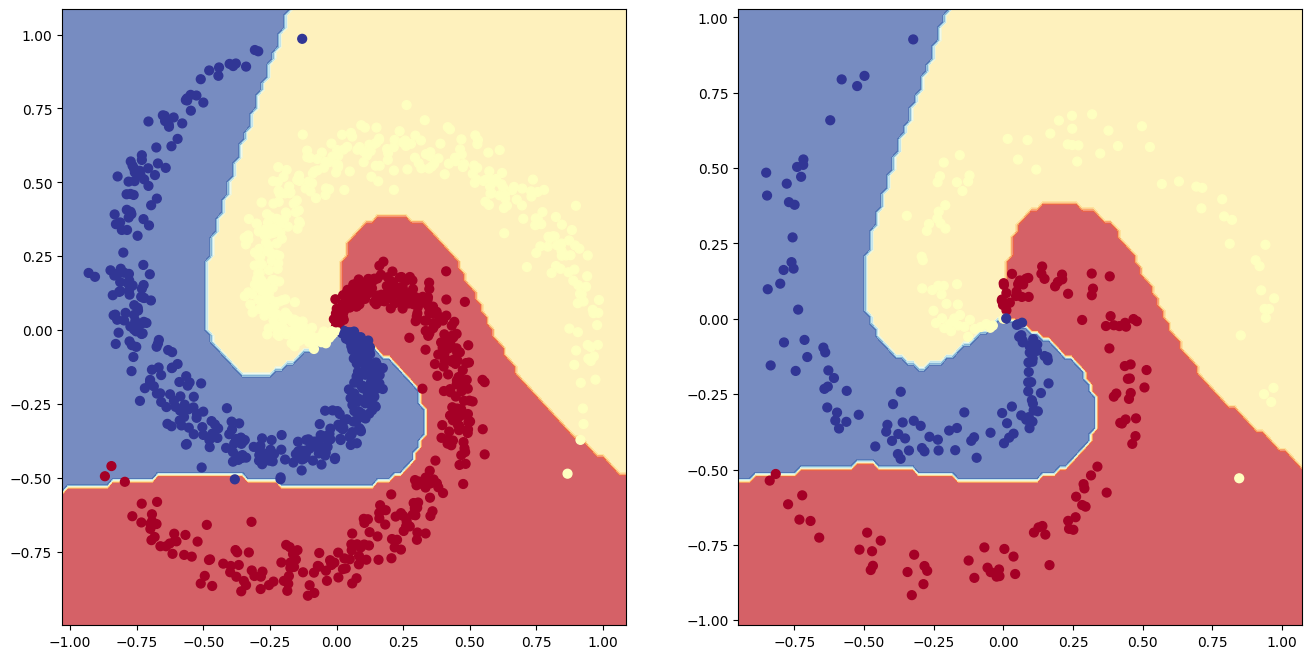

In [27]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_2, X_spiral_train, y_spiral_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X_spiral_test, y_spiral_test)

In [28]:
import sklearn
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import requests
from pathlib import Path
import numpy as np

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

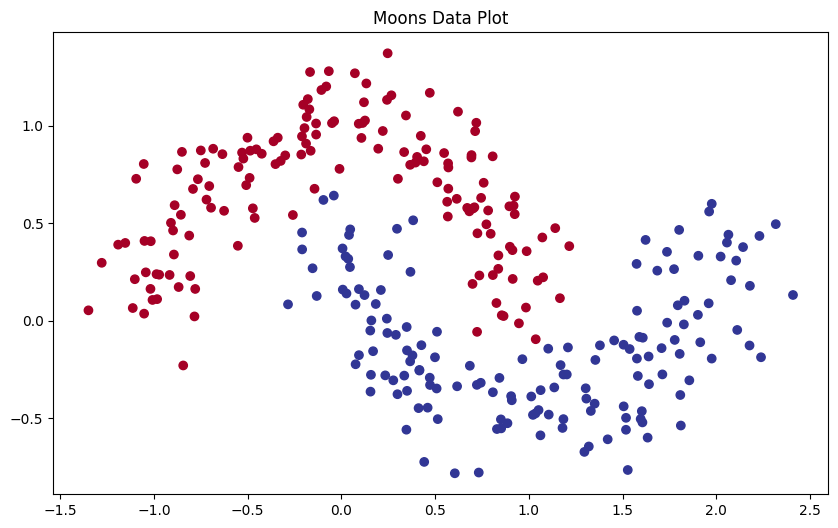

In [30]:
X_moon, y_moon = make_moons(n_samples=300,
                            shuffle=True,
                            noise=0.15,
                            random_state=42)

plt.figure(figsize=(10, 6))
plt.title("Moons Data Plot")
plt.scatter(X_moon[:, 0],
            X_moon[:, 1],
            c=y_moon,
            cmap=plt.cm.RdYlBu);

In [31]:
X_moon = torch.from_numpy(X_moon).type(torch.float)
y_moon = torch.from_numpy(y_moon).type(torch.float)

In [32]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon,
                                                                        y_moon,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [33]:
X_moon_train.shape, X_moon_test.shape, y_moon_train.shape, y_moon_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [34]:
class MoonModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_3 = MoonModelV1(2, 1).to(device)
model_3

MoonModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [35]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_moon_train, y_moon_train = X_moon_train.to(device), y_moon_train.to(device)
X_moon_test, y_moon_test = X_moon_test.to(device), y_moon_test.to(device)

epochs_count = []
loss_values = []
test_loss_values = []
acc_values = []
test_acc_values = []

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_moon_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_moon_train)
  acc = accuracy_fn(y_moon_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_moon_test).squeeze()

    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_moon_test)
    test_acc = accuracy_fn(y_moon_test, test_preds)

    if epoch % 50 == 0:
      epochs_count.append(epoch)
      loss_values.append(loss)
      acc_values.append(acc)
      test_loss_values.append(test_loss)
      test_acc_values.append(test_acc)

      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69572 | Acc: 48.33 | Test Loss: 0.68835 | Test Acc: 56.67
Epoch: 50 | Loss: 0.51883 | Acc: 82.50 | Test Loss: 0.46992 | Test Acc: 90.00
Epoch: 100 | Loss: 0.29870 | Acc: 85.42 | Test Loss: 0.21794 | Test Acc: 91.67
Epoch: 150 | Loss: 0.25664 | Acc: 89.58 | Test Loss: 0.19193 | Test Acc: 90.00
Epoch: 200 | Loss: 0.22419 | Acc: 90.42 | Test Loss: 0.17378 | Test Acc: 91.67
Epoch: 250 | Loss: 0.18341 | Acc: 92.50 | Test Loss: 0.14573 | Test Acc: 93.33
Epoch: 300 | Loss: 0.13916 | Acc: 94.58 | Test Loss: 0.11144 | Test Acc: 95.00
Epoch: 350 | Loss: 0.09900 | Acc: 96.67 | Test Loss: 0.07801 | Test Acc: 100.00
Epoch: 400 | Loss: 0.07106 | Acc: 97.50 | Test Loss: 0.05366 | Test Acc: 100.00
Epoch: 450 | Loss: 0.05484 | Acc: 98.75 | Test Loss: 0.03889 | Test Acc: 100.00
Epoch: 500 | Loss: 0.04471 | Acc: 98.75 | Test Loss: 0.03004 | Test Acc: 100.00
Epoch: 550 | Loss: 0.03794 | Acc: 98.75 | Test Loss: 0.02433 | Test Acc: 100.00
Epoch: 600 | Loss: 0.03296 | Acc: 99.17 | Test Los

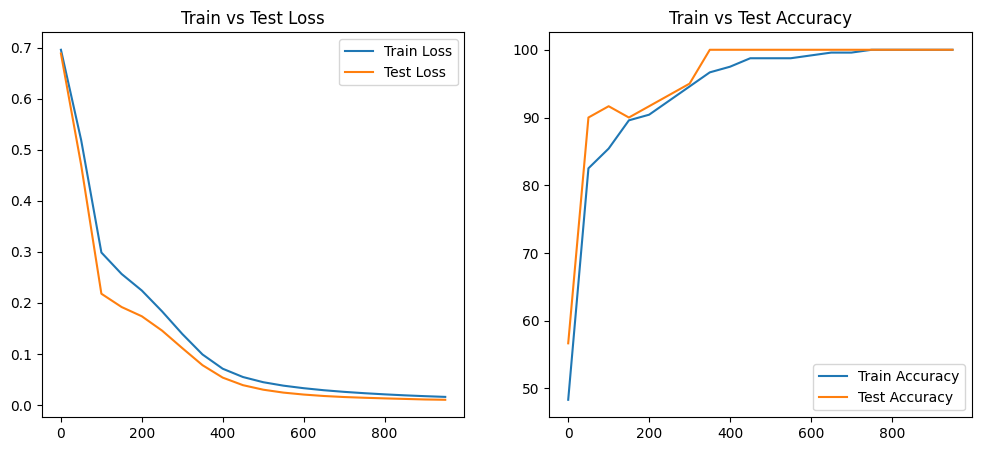

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train vs Test Loss")
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.legend();
plt.subplot(1, 2, 2)
plt.title("Train vs Test Accuracy")
plt.plot(epochs_count, np.array(torch.tensor(acc_values).numpy()), label="Train Accuracy")
plt.plot(epochs_count, np.array(torch.tensor(test_acc_values).numpy()), label="Test Accuracy")
plt.legend();


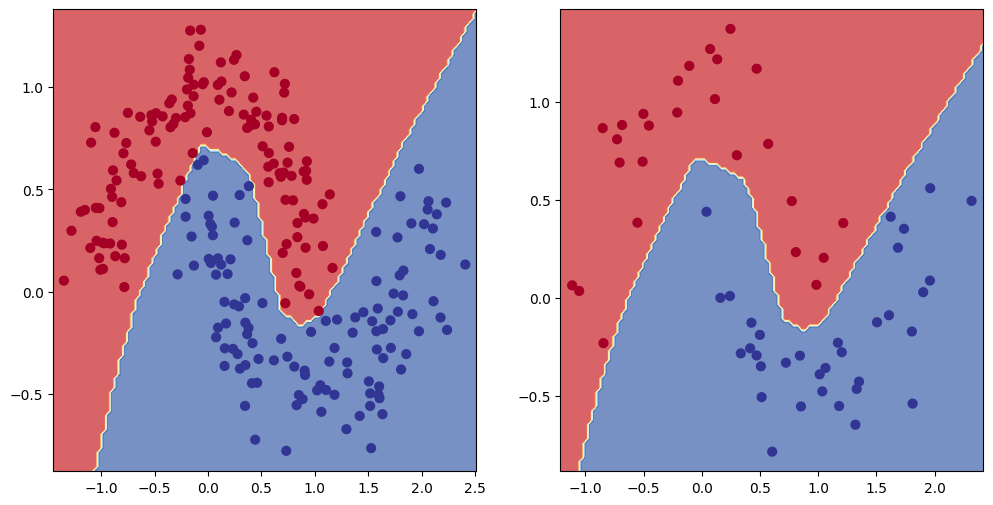

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_moon_train, y_moon_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_moon_test, y_moon_test)